# UberEats配達データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [3]:
date = "2020/05/11"

In [4]:
FILE_PATH = './../data/trip_master.csv'
master = pd.read_csv(FILE_PATH, index_col='id')

In [5]:
print(len(master))
# master.head(5)

1241


In [6]:
master.columns

Index(['date', 'day', 'day_of_week', 'distance', 'drive_time', 'drop_address',
       'drop_latitude', 'drop_longitude', 'drop_time', 'month',
       'pickup_address', 'pickup_latitude', 'pickup_longitude', 'pickup_time',
       'price', 'url', 'year', 'cash', 'peak'],
      dtype='object')

In [7]:
df = master.assign(
    pickup_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.pickup_time.split(':')[0]), minute=int(x.pickup_time.split(':')[1])), axis=1),
    drop_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.drop_time.split(':')[0]), minute=int(x.drop_time.split(':')[1])), axis=1),    
    shop_position_id = master.apply(lambda x: str(x.pickup_latitude) + "-" + str(x.pickup_longitude), axis=1)
                  ) .drop(['date', 'day', 'year', 'url', 'pickup_latitude', 'pickup_time', 'pickup_longitude', 'pickup_address', 
                           'day_of_week', 'pickup_time', 'drop_time', "drop_address", "drop_latitude", "drop_longitude"], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1241 entries, d92f23b6-46a8-48d7-823c-8cadb9182193 to 308a774a-299d-45d0-b057-a12898c0633a
Data columns (total 9 columns):
distance            1241 non-null float64
drive_time          1233 non-null float64
month               1241 non-null int64
price               1210 non-null float64
cash                1068 non-null float64
peak                1068 non-null float64
pickup_datetime     1241 non-null datetime64[ns]
drop_datetime       1241 non-null datetime64[ns]
shop_position_id    1241 non-null object
dtypes: datetime64[ns](2), float64(5), int64(1), object(1)
memory usage: 97.0+ KB


In [9]:
df['date'] = df['pickup_datetime'].dt.date
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['pickup_datetime'].dt.weekday_name
df['month_day_num'] = df['pickup_datetime'].dt.day
df["hour_of_day"] = df['pickup_datetime'].dt.hour
df["week_of_month"] = df['pickup_datetime'].dt.week

In [10]:
# df.head(3)

## 毎日のデータ集計

In [11]:
target_day = datetime.datetime.strptime(date, "%Y/%m/%d").date()

# target_day = datetime.datetime(2020, 3, 21).date()
# target_day = datetime.datetime.today().date()
df_day = df[df["date"] == target_day].sort_values('pickup_datetime')

In [12]:
df_day

,distance,drive_time,month,price,cash,peak,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,,,
af8b261e-1ac6-4fb2-8a0f-397c03a77638,1.24,11.6,5,400.0,0.0,444.0,2020-05-11 10:35:00,2020-05-11 10:49:00,35.58116912841797-139.64143371582028,2020-05-11,0,Monday,11,10,20
b645852c-3cb8-4c41-8267-e6a3779d2c85,0.98,9.4,5,386.0,0.0,429.0,2020-05-11 10:46:00,2020-05-11 11:05:00,35.5744743347168-139.65885925292972,2020-05-11,0,Monday,11,10,20
15cf9d37-f87a-4e93-bba4-a150a9a92670,1.17,9.9,5,396.0,0.0,440.0,2020-05-11 11:17:00,2020-05-11 11:27:00,35.58109664916992-139.641357421875,2020-05-11,0,Monday,11,11,20
e3c8a947-08ee-4794-943c-87f171608081,3.40,14.2,5,646.0,0.0,130.0,2020-05-11 11:36:00,2020-05-11 11:55:00,35.58148956298828-139.64111328125,2020-05-11,0,Monday,11,11,20
bbf5a8f6-f06f-4429-986d-f1f088f7ac88,3.23,32.0,5,900.0,0.0,285.0,2020-05-11 11:51:00,2020-05-11 12:23:00,35.56451797485352-139.653564453125,2020-05-11,0,Monday,11,11,20
bbf5a8f6-f06f-4429-986d-f1f088f7ac88,0.00,0.0,5,0.0,0.0,0.0,2020-05-11 11:51:00,2020-05-11 12:23:00,35.56451797485352-139.653564453125,2020-05-11,0,Monday,11,11,20
308a774a-299d-45d0-b057-a12898c0633a,0.00,0.0,5,0.0,0.0,0.0,2020-05-11 12:33:00,2020-05-11 13:08:00,35.581016540527344-139.63896179199222,2020-05-11,0,Monday,11,12,20
308a774a-299d-45d0-b057-a12898c0633a,2.88,35.0,5,761.0,5782.0,-66.0,2020-05-11 12:33:00,2020-05-11 13:08:00,35.581016540527344-139.63896179199222,2020-05-11,0,Monday,11,12,20
91948919-0106-4517-9dba-33f66e289433,1.19,10.4,5,397.0,0.0,441.0,2020-05-11 13:27:00,2020-05-11 13:40:00,35.58115768432617-139.64137268066406,2020-05-11,0,Monday,11,13,20


In [13]:
drive_count = len(df_day)
drive_hours = round(df_day["drive_time"].sum() / 60, 1)
drive_length = round(df_day["distance"].sum() , 2)
total_price = df_day["price"].sum()
long_count = len(df_day[df_day["distance"] >= 2])
short_count = len(df_day[(df_day["distance"] < 1) & (df_day["distance"] > 0) ])
double_count = len(df_day[df_day["distance"] == 0])
cash_count = len(df_day[df_day["cash"] != 0])
peak_count = len(df_day[df_day["peak"] != 0])
peak_sum = int(df_day[df_day["peak"] != 0].sum()["peak"])

In [14]:
print("{}  配達件数: {}件, 配達時間: {}h, 配達距離: {}km, 配達報酬: {}円, ロング{}件, ショート{}件, ピーク{}件({}円), 現金{}件, ダブル{}件"
      .format(target_day, drive_count, drive_hours, drive_length, total_price, long_count, short_count, peak_count, peak_sum, cash_count, double_count))

2020-05-11  配達件数: 20件, 配達時間: 4.7h, 配達距離: 31.66km, 配達報酬: 8164.0円, ロング7件, ショート2件, ピーク16件(5311円), 現金4件, ダブル4件


## 日別の集計

In [15]:
groupby = df.groupby('date')

In [16]:
df_by_day = pd.DataFrame()
df_by_day["配達件数"] = groupby["pickup_datetime"].count()
df_by_day["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_day["配達距離(km)"] = groupby["distance"].sum()
df_by_day["配達報酬(円)"] = groupby["price"].sum()
df_by_day["ロング"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_day["ダブル"] = groupby.apply(lambda x: x[x.distance == 0]['distance'].count())
df_by_day["ショート"] = groupby.apply(lambda x: x[x.distance < 2]['distance'].count()) - df_by_day["ダブル"]
df_by_day["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_day["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_day["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_day["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)
df_by_day["平均距離"] = round(groupby["distance"].mean(), 2)

In [17]:
df_by_day.index.name = '月日'
df_by_day.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロング,ダブル,ショート,ピーク件数,現金件数,1kmの時間(分),時速,平均距離
月日,,,,,,,,,,,,
2020-04-07,12,2.9,27.13,6223.0,7,0,5,1,5,6.5,9.30,2.26
2020-04-08,18,4.4,38.93,8993.0,10,0,8,2,8,6.8,8.88,2.16
2020-04-09,11,3.2,21.14,5867.0,4,0,7,1,5,9.2,6.56,1.92
2020-04-10,7,1.7,13.57,3490.0,4,0,3,1,2,7.7,7.78,1.94
2020-04-14,21,4.8,37.75,10050.0,7,0,14,2,9,7.7,7.83,1.80
2020-04-15,17,3.7,30.81,7544.0,5,0,12,1,4,7.2,8.31,1.81
2020-04-16,25,5.7,58.58,13956.0,16,0,9,2,6,5.8,10.32,2.34
2020-04-19,20,3.4,33.09,10156.0,6,0,14,0,0,6.2,9.70,1.65
2020-04-21,20,4.3,27.44,9525.0,3,0,17,0,0,9.5,6.33,1.37


## 週別の集計

In [18]:
groupby = df.groupby('week_of_month')

In [19]:
df_by_week = pd.DataFrame()
df_by_week["配達件数"] = groupby["pickup_datetime"].count()
df_by_week["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_week["配達距離(km)"] = groupby["distance"].sum()
df_by_week["配達報酬(円)"] = groupby["price"].sum()
df_by_week["ロング"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_week["ダブル"] = groupby.apply(lambda x: x[x.distance == 0]['distance'].count())
df_by_week["ショート"] = groupby.apply(lambda x: x[x.distance < 1]['distance'].count()) - df_by_week["ダブル"]
df_by_week["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_week["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_week["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_week["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)
df_by_week["平均距離"] = round(groupby["distance"].mean(), 1)

In [20]:
df_by_week.index.name = '週番号'
df_by_week.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロング,ダブル,ショート,ピーク件数,現金件数,1kmの時間(分),時速,平均距離
週番号,,,,,,,,,,,,
1,26,6.5,40.66,12875.0,7,0,3,0,0,9.6,6.23,1.6
2,59,15.0,88.88,26269.0,13,0,14,0,0,10.1,5.93,1.5
3,42,10.4,67.94,20883.0,13,0,12,13,22,9.2,6.51,1.6
4,31,7.5,56.67,14836.0,11,0,3,5,19,8.0,7.52,1.8
5,51,13.2,87.63,26421.0,14,0,8,16,30,9.1,6.62,1.7
6,35,8.4,55.55,17142.0,9,0,10,1,9,9.1,6.62,1.6
7,56,12.5,80.61,28469.0,10,0,15,13,16,9.3,6.44,1.4
8,54,11.2,74.19,25641.0,4,0,13,8,23,9.1,6.61,1.4
9,52,11.9,78.87,28619.0,11,0,12,9,14,9.0,6.64,1.5


## 月別の集計

In [21]:
groupby = df.groupby('month')
df_by_month = pd.DataFrame()
df_by_month["配達件数"] = groupby["pickup_datetime"].count()
df_by_month["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_month["配達距離(km)"] = groupby["distance"].sum()
df_by_month["配達報酬(円)"] = groupby["price"].sum()
df_by_month["ロング"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_month["ダブル"] = groupby.apply(lambda x: x[x.distance == 0]['distance'].count())
df_by_month["ショート"] = groupby.apply(lambda x: x[x.distance < 1]['distance'].count()) - df_by_month["ダブル"]
df_by_month["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_month["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_month["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_month["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)
df_by_month["平均距離"] = round(groupby["distance"].mean(), 1)

In [22]:
df_by_month.index.name = '月'
df_by_month

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロング,ダブル,ショート,ピーク件数,現金件数,1kmの時間(分),時速,平均距離
月,,,,,,,,,,,,
1,168,42.3,275.81,79884.0,48,0,33,24,56,9.2,6.52,1.6
2,212,48.0,312.48,108459.0,37,0,54,39,73,9.2,6.51,1.5
3,187,43.6,332.59,88425.0,65,0,31,19,59,7.9,7.63,1.8
4,325,74.9,599.77,145389.0,126,6,51,41,82,7.5,8.01,1.8
5,249,59.5,434.26,114321.0,88,16,45,130,64,8.2,7.30,1.7
12,100,33.1,169.77,48737.0,27,0,19,0,0,11.7,5.13,1.7


## 全データ分析

Text(0.5, 1.0, '曜日ごとの配達回数')

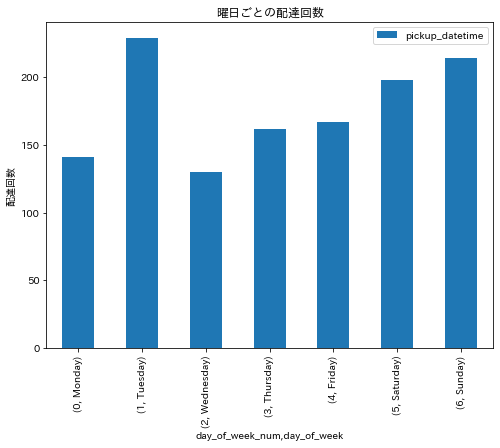

In [23]:
uber_weekdays = df.pivot_table(index=['day_of_week_num','day_of_week'],
                                  values='pickup_datetime',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('曜日ごとの配達回数')

Text(0.5, 1.0, '日にちごとの配達回数')

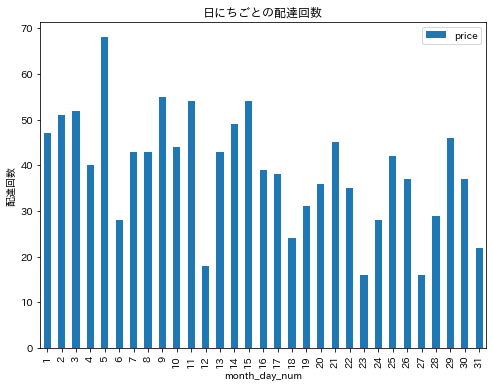

In [24]:
uber_monthdays = df.pivot_table(index=['month_day_num'],
                                  values='price',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('日にちごとの配達回数')

Text(0.5, 1.0, '時間ごとの配達回数')

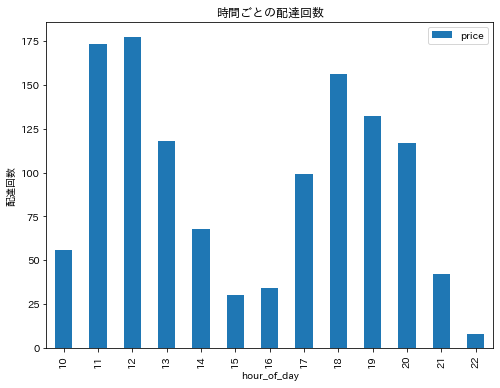

In [25]:
uber_hour = df.pivot_table(index=['hour_of_day'],
                                  values='price',
                                  aggfunc='count')
uber_hour.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('時間ごとの配達回数')

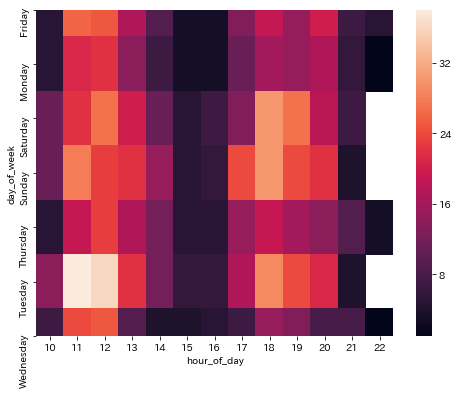

In [26]:
def count_rows(rows):
    return len(rows)

by_cross = df.groupby('day_of_week hour_of_day'.split()).apply(count_rows).unstack()
sns.heatmap(by_cross)

## 